# 项目：分析鸢尾花种类数据

## 分析目标

此数据分析报告的目的是基于鸢尾花的属性数据，分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异，让我们可以对不同种类鸢尾花的属性特征进行推断。

## 简介

原始数据`Iris.csv`包括两种鸢尾花，每种有 50 个样本，以及每个样本的一些属性，包括萼片的长度和宽度、花瓣的长度和宽度。

`Iris.csv`每列的含义如下：
- Id：样本的ID。
- SepalLengthCm：萼片的长度（单位为厘米）。
- SepalWidthCm：萼片的宽度（单位为厘米）。
- PetalLengthCm：花瓣的长度（单位为厘米）。
- PetalWidthCm：花瓣的宽度（单位为厘米）。
- Species：鸢尾花种类。

## 分析流程

### 一.数据的读取与准备工作

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data=pd.read_csv("./iris.csv")
original_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#复制一份数据
clean_data=original_data.copy()
clean_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 二.数据的评估与清洗

#### 1.结构性问题

In [4]:
clean_data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
30,31,4.8,3.1,1.6,0.2,Iris-setosa
27,28,5.2,3.5,1.5,0.2,Iris-setosa
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
44,45,5.1,3.8,1.9,0.4,Iris-setosa
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
36,37,5.5,3.5,1.3,0.2,Iris-setosa
14,15,5.8,4.0,1.2,0.2,Iris-setosa
25,26,5.0,3.0,1.6,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa


随机取样发现数据不存在结构上的错误

#### 2.内容性问题

#### （1）缺失数据

In [5]:
#使用info方法
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


观察发现所有数据均无缺失，但Id的类型应该为字符串而不应该为整型，因此需要进行数据转换

In [6]:
#千万要记得赋值操作
clean_data["Id"]=clean_data["Id"].astype(str)
clean_data["Id"]

0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: Id, Length: 100, dtype: object

#### （2）重复数据

在6个变量中，除了Id以外，其余数据均可以允许重复

In [7]:
clean_data["Id"].value_counts()

Id
1      1
2      1
3      1
4      1
5      1
      ..
96     1
97     1
98     1
99     1
100    1
Name: count, Length: 100, dtype: int64

发现Id并没有重复的情况

#### （3）不一致数据

可能存在不一致情况的数据只有Id和Species，在上一步中我们已经检查了Id，这里只需要检查Species即可

In [8]:
clean_data["Species"].value_counts().sort_values()

Species
Iris-setosa        50
Iris-versicolor    50
Name: count, dtype: int64

发现刚刚好有两种鸢尾花，不存在一种鸢尾花有多个名称的情况

#### （4）无效数据

In [9]:
#使用describe方法
clean_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000
std,0.641698,0.476057,1.448565,0.566288
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


发现并没有脱离实际的数据

#### （5）保存数据

In [28]:
clean_data.to_csv("Iris_cleaned.csv",index=False)

### 三.数据的整理

为了后续的独立性检验，我们需要把两种鸢尾花的数据分离出来

In [10]:
setosa_data=clean_data.query('Species=="Iris-setosa"')
setosa_data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
42,43,4.4,3.2,1.3,0.2,Iris-setosa
0,1,5.1,3.5,1.4,0.2,Iris-setosa
24,25,4.8,3.4,1.9,0.2,Iris-setosa
41,42,4.5,2.3,1.3,0.3,Iris-setosa
38,39,4.4,3.0,1.3,0.2,Iris-setosa
23,24,5.1,3.3,1.7,0.5,Iris-setosa
29,30,4.7,3.2,1.6,0.2,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
45,46,4.8,3.0,1.4,0.3,Iris-setosa
49,50,5.0,3.3,1.4,0.2,Iris-setosa


In [11]:
versicolor_data=clean_data.query('Species=="Iris-versicolor"')
versicolor_data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
85,86,6.0,3.4,4.5,1.6,Iris-versicolor
88,89,5.6,3.0,4.1,1.3,Iris-versicolor
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
81,82,5.5,2.4,3.7,1.0,Iris-versicolor


### 四.数据分析

首先需要考虑采用t检验还是z检验
由于总体方差未知，且样本数量并不是很大，所以可以采用t检验

In [12]:
#导入所需要的库函数
from scipy.stats import ttest_ind

在正式检验前，我们可以绘制出配对图，先观察一下

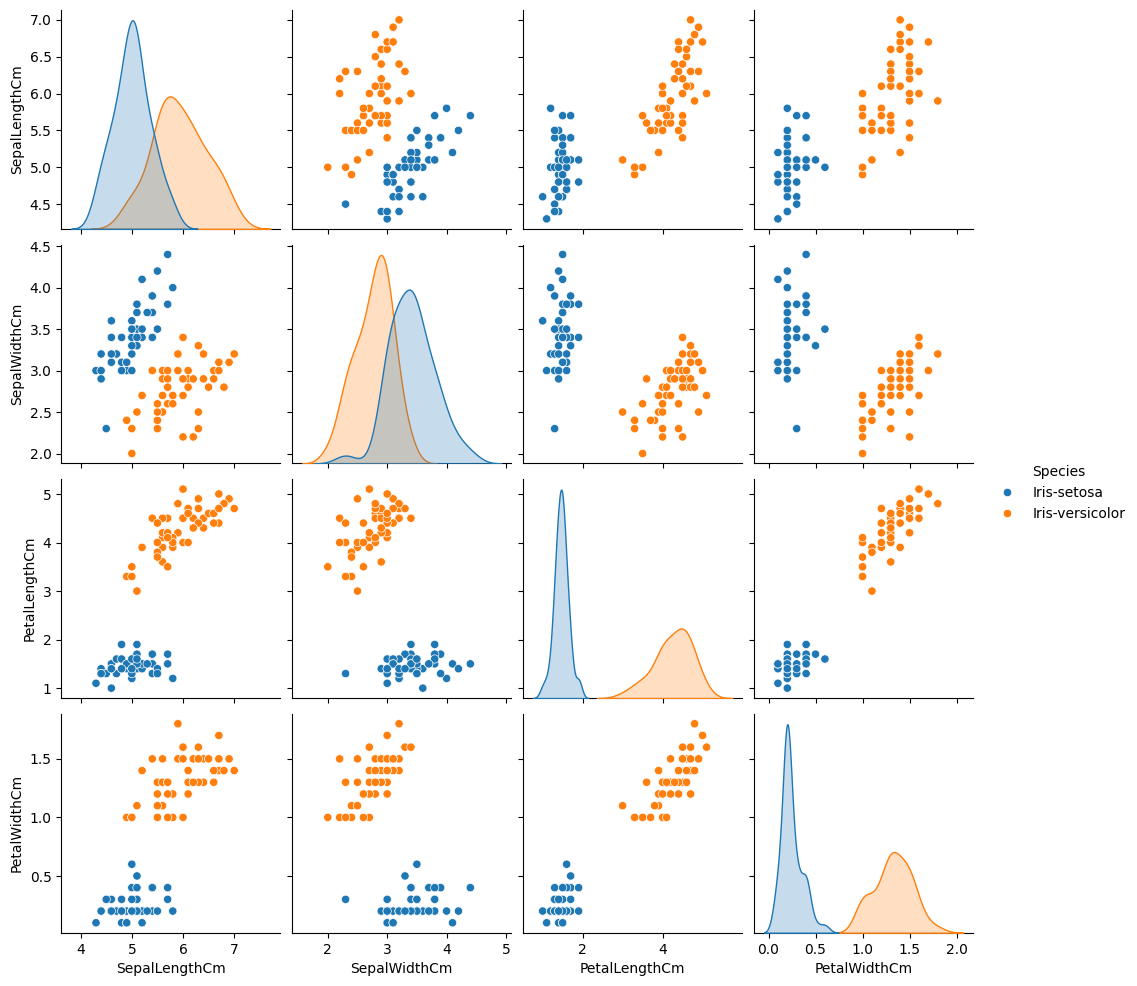

In [13]:
sns.pairplot(clean_data,hue="Species")

从配对图中可以看出，两种鸢尾花的各项数据大致呈正态分布，符合t检验的前提条件

并且可以看出花瓣长度和花瓣宽度差别较显著

#### 1.萼片长度

In [14]:
#提取数据
setosa_sepalLength=setosa_data["SepalLengthCm"]
versicolor_sepalLength=versicolor_data["SepalLengthCm"]

#### （1）建立假设

$H_0$:两种鸢尾花的萼片长度没有显著差别

$H_1$：两种鸢尾花的萼片长度有显著差别

这里我们可以先绘制萼片长度的直方图观察一下

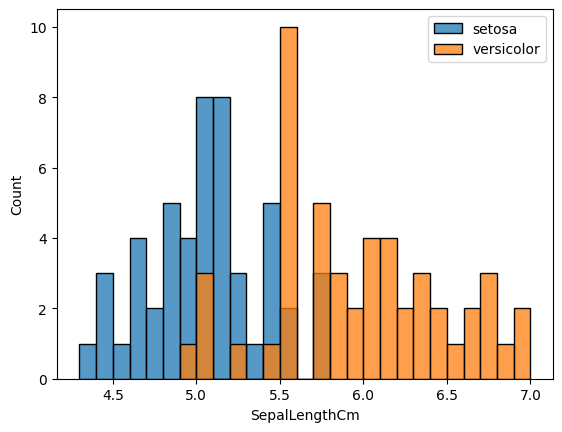

In [15]:
sns.histplot(setosa_data["SepalLengthCm"],binwidth=0.1,label="setosa")
sns.histplot(versicolor_data["SepalLengthCm"],binwidth=0.1,label="versicolor")
#显示图例需要调用legend
plt.legend()
plt.show()

#### （2）选择单尾或者双尾

由于我们的目的是探究两种鸢尾花各数据是否存在显著差异，而不需要进行比较，所以选择双尾检验，后续三个数据同样选择双尾检验，不再赘述

#### （3）确定显著水平

对于双尾检验，显著水平一般取0.05，后续三个数据同样选择0.05，不再赘述

#### （4）计算与比较

In [16]:
t_stat1,p_value1=ttest_ind(setosa_sepalLength,versicolor_sepalLength)
print(f"t值为：{t_stat1}")
print(f"p值为：{p_value1}")

t值为：-10.52098626754911
p值为：8.985235037487079e-18


从得到的p值来看，p值远小于显著水平0.05，说明应该拒绝原假设

#### （5）结论

两种鸢尾花的萼片长度存在显著差异

#### 2.萼片宽度

In [17]:
#提取数据
setosa_sepalWidth=setosa_data["SepalWidthCm"]
versicolor_sepalWidth=versicolor_data["SepalWidthCm"]

#### （1）建立假设

$H_0$:两种鸢尾花的萼片宽度没有显著差别

$H_1$:两种鸢尾花的萼片宽度有显著差别

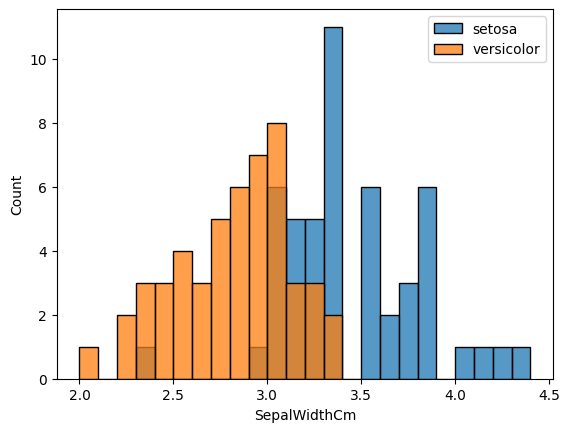

In [19]:
sns.histplot(setosa_data["SepalWidthCm"],binwidth=0.1,label="setosa")
sns.histplot(versicolor_data["SepalWidthCm"],binwidth=0.1,label="versicolor")
#显示图例需要调用legend
plt.legend()
plt.show()

#### （2）计算与比较

In [18]:
t_stat2,p_value2=ttest_ind(setosa_sepalWidth,versicolor_sepalWidth)
print(f"t值为：{t_stat2}")
print(f"p值为：{p_value2}")

t值为：9.282772555558111
p值为：4.362239016010214e-15


同样的，由于p值远小于显著水平0.05，所以我们拒绝原假设

#### (3)结论

两种鸢尾花的萼片宽度存在显著差异

#### 3.花瓣长度

In [21]:
#提取数据
setosa_petalLength=setosa_data["PetalLengthCm"]
versicolor_petalLength=versicolor_data["PetalLengthCm"]

#### （1）建立假设

$H_0$:两种鸢尾花的花瓣长度没有显著差别

$H_1$:两种鸢尾花的花瓣长度有显著差别

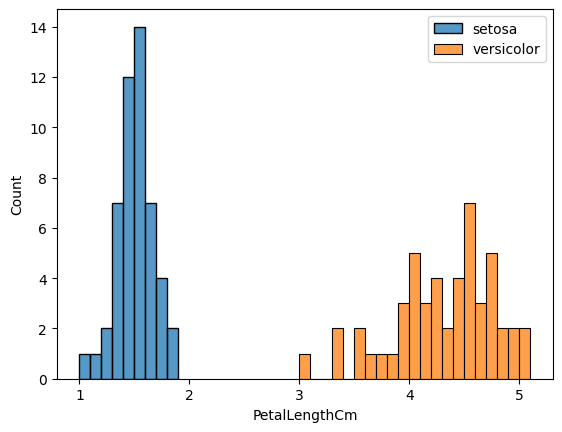

In [22]:
sns.histplot(setosa_data["PetalLengthCm"],binwidth=0.1,label="setosa")
sns.histplot(versicolor_data["PetalLengthCm"],binwidth=0.1,label="versicolor")
#显示图例需要调用legend
plt.legend()
plt.show()

#### （2）计算与比较

In [24]:
t_stat3,p_value3=ttest_ind(setosa_petalLength,versicolor_petalLength)
print(f"t值为：{t_stat3}")
print(f"p值为：{p_value3}")

t值为：-39.46866259397272
p值为：5.717463758170621e-62


p值远小于显著水平0.05，所以我们应该拒绝原假设

#### (3)结论

两种鸢尾花的花瓣长度存在显著差异

#### 4.花瓣宽度

In [25]:
#提取数据
setosa_petalWidth=setosa_data["PetalWidthCm"]
versicolor_petalWidth=versicolor_data["PetalWidthCm"]

#### （1）建立假设

$H_0$:两种鸢尾花的花瓣宽度没有显著差别

$H_1$:两种鸢尾花的花瓣宽度有显著差别

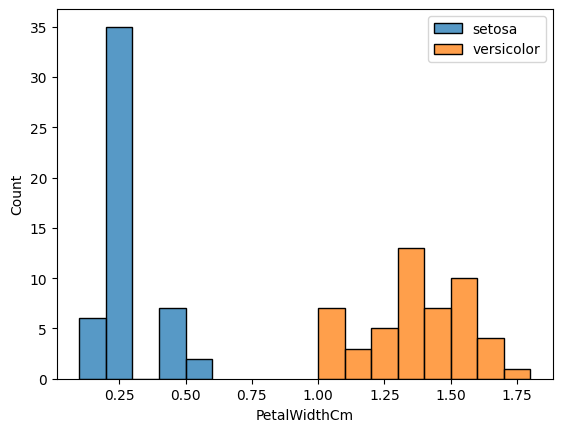

In [26]:
sns.histplot(setosa_data["PetalWidthCm"],binwidth=0.1,label="setosa")
sns.histplot(versicolor_data["PetalWidthCm"],binwidth=0.1,label="versicolor")
#显示图例需要调用legend
plt.legend()
plt.show()

#### （2）计算与比较

In [27]:
t_stat4,p_value4=ttest_ind(setosa_petalWidth,versicolor_petalWidth)
print(f"t值为：{t_stat4}")
print(f"p值为：{p_value4}")

t值为：-34.01237858829048
p值为：4.589080615710866e-56


计算所得到的p值远小于显著水平0.05，所以我们应该拒绝原假设

#### （3）结论

两种鸢尾花的花瓣宽度存在显著差异

## 结论

经过一系列数据分析流程，我们可以得出结论：两种鸢尾花在萼片长度、萼片宽度、花瓣长度、花瓣宽度上均存在显著差异